In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback as tb

In [2]:
df = pd.read_csv('train.dat', delimiter='\t', header=None)

In [3]:
df.head()

,0,1
0,-1,DVELDLVEISPNALP
1,-1,KADEELFNKLFFGT
2,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,-1,RDQMRARIADITGVAISRIA
4,-1,RKRLQLLLL


In [4]:
df_results = df[0]

In [5]:
df_results.columns = ['Labels']

In [6]:
df_results

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1561   -1
1562    1
1563    1
1564   -1
1565   -1
Name: 0, Length: 1566, dtype: int64

In [7]:
df_seq = df[[1]]

In [8]:
df_seq.columns = ['Sequence']

In [9]:
df_seq.head()

,Sequence
0,DVELDLVEISPNALP
1,KADEELFNKLFFGT
2,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,RDQMRARIADITGVAISRIA
4,RKRLQLLLL


In [10]:
def dna_k_mers_generation(dna_sequence, k_mers_length):
    k_mers_list = []
    try:
        for i in range(len(dna_sequence) - k_mers_length + 1):
            k_mer_substring = dna_sequence[i : i + k_mers_length]
            k_mers_list.append(k_mer_substring)
    except Exception as e:
        tb.print_exc()
    return k_mers_list

In [11]:
# Assuming you have a function to load and preprocess your test dataset
# and your trained neural network 'nn' is available

# Load your test dataset
test_data = pd.read_csv('test.dat', delimiter='\t', header=None)
test_data.columns = ['Sequence']


In [12]:
df_seq.head()
df_seq.shape

(1566, 1)

In [13]:
test_data.shape

(392, 1)

In [14]:
def calculate_amino_acid_frequencies(sequences):
    amino_acids = 'ABCDEFGHIJKLMNOPQRSTUVWYZ'
    frequencies = np.zeros((len(sequences), len(amino_acids)))

    for i, sequence in enumerate(sequences):
        for aa in sequence:
            if aa in amino_acids:
                aa_index = amino_acids.index(aa)
                frequencies[i, aa_index] += 1

    return frequencies

# Example usage:
train_sequences = df_seq  # Replace with your actual training sequences
train_aa_frequencies = calculate_amino_acid_frequencies(train_sequences['Sequence'])

# Convert the frequencies to a numpy array or another suitable format for further processing
import numpy as np
train_freq_array = np.array(train_aa_frequencies)

In [15]:
train_freq_array.shape

(1566, 25)

In [16]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Combine training and testing sequences
# combined_sequences = pd.concat([df_seq, test_data], axis=0)
# combined_sequences.shape

# # Initialize CountVectorizer for k-mer features
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))

# # Apply CountVectorizer to the combined sequences
# vectorized_data = vectorizer.fit_transform(combined_sequences['Sequence']).toarray()

# # Split the vectorized data back into training and testing sets
# train_vectorized = vectorized_data[:len(df_seq)]
# test_vectorized = vectorized_data[len(df_seq):]

# # Verify the shapes of the vectorized datasets
# train_vectorized.shape, test_vectorized.shape


In [17]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
# X = vectorizer.fit_transform(df_seq['Sequence']).toarray()
X = train_freq_array

In [18]:
X.shape

(1566, 25)

In [19]:
# k_mers_list = []# Range of k-mer lengths (e.g., 2 to 5)
# for k in range(2, 6):
#     df_seq[f'kmers_{k}'] = df_seq['Sequence'].apply(lambda x: dna_k_mers_generation(x, k))

In [20]:
df_results.shape

(1566,)

In [21]:
from imblearn.over_sampling import SMOTE

y = df_results

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
# Check the balance of the classes
# print(pd.Series(y_resampled).value_counts()).to_clipboard()

In [23]:
df_results.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: 0, dtype: int64

In [24]:
df_results.value_counts()

0
-1    1424
 1     142
Name: count, dtype: int64

In [25]:
df_resampled = pd.DataFrame(X_resampled)
# df_resampled.to_clipboard(index=False)

In [26]:
df_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,1.0,2.0,0.0,6.0,4.0,2.0,0.0,0.0,...,0.0,0.0,5.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0
3,4.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,...,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# df_resampled.to_clipboard()

In [28]:
df_resampled.to_csv('features_resampled_dict_count.csv')
features_resampled = pd.DataFrame(y_resampled)
features_resampled.to_csv('labels_resampled_dict_count.csv')

In [29]:
df_resampled.shape

(2848, 25)

In [30]:
y_resampled.shape

(2848,)

In [31]:
features_resampled.columns = ['Labels']

In [32]:
## Validation test creation
combined_df_resampled = pd.concat([df_resampled, features_resampled], axis= 1)
combined_df_resampled.shape

(2848, 26)

In [33]:
from sklearn.model_selection import train_test_split

df_resampled_train, df_resampled_val, label_resampled_train, label_resampled_val = train_test_split(df_resampled, features_resampled, test_size= 0.3, random_state=42)

In [34]:
print(df_resampled_train.shape)
print(df_resampled_val.shape)
print(label_resampled_train.shape)
print(label_resampled_val.shape)

(1993, 25)
(855, 25)
(1993, 1)
(855, 1)


In [35]:
label_resampled_train

,Labels
1650,1
1398,-1
1972,1
1725,1
1128,-1
...,...
1638,1
1095,-1
1130,-1
1294,-1


In [93]:
import numpy as np
import scipy.special

class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, lambda_reg, class_weights=None):
        # Set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # Initialize weights with a normal distribution
        self.wih = np.random.normal(0.0, np.sqrt(2.0 / self.inodes), (self.hnodes, self.inodes))
        # self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # Class weights (keys are -1 and 1)
        self.class_weights = class_weights if class_weights is not None else {-1: 1, 1: 1}


        print(self.wih)
        print(self.who)

        # Learning ratek
        self.lr = learningrate
        
        # Activation functions
        self.activation_function_hidden = lambda x: np.maximum(0, x)  # ReLU for hidden layers
        self.activation_function_output = lambda x: scipy.special.expit(x)  # Sigmoid for output layer

        # Regularizing parameter
        self.lambda_reg = lambda_reg

        pass

    def sigmoid(self, x):
        # Modified sigmoid function with input clipping
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        # Adjust targets from -1 to 0, keep 1 as is
        targets = np.array([(0 if t == -1 else 1) for t in targets_list], ndmin=2).T

        # Forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function_hidden(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)

        # Error calculation
        output_errors = targets - final_outputs
        weighted_errors = np.where(targets == 1, output_errors * self.class_weights[1], output_errors * self.class_weights[-1])
        hidden_errors = np.dot(self.who.T, output_errors)

        # Gradient for output layer
        output_gradient = weighted_errors * final_outputs * (1.0 - final_outputs)

        # Gradient clipping for output layer
        max_gradient = 1.0  # Set your desired maximum gradient value
        output_gradient = np.clip(output_gradient, -max_gradient, max_gradient)
        


        # Update output layer weights
        # self.who += self.lr * (np.dot(output_gradient, np.transpose(hidden_outputs)) + self.lambda_reg * self.who)
        self.who += self.lr * (np.dot(output_gradient, np.transpose(hidden_outputs)) - self.lambda_reg * self.who)

        # Gradient for hidden layer (considering ReLU derivative)
        hidden_gradient = hidden_errors * (hidden_outputs > 0)
        # Gradient clipping for hidden layer
        hidden_gradient = np.clip(hidden_gradient, -max_gradient, max_gradient)

        # Update hidden layer weights
        self.wih += self.lr * (np.dot(hidden_gradient, np.transpose(inputs)) - self.lambda_reg * self.wih)
        
        pass

    def query(self, inputs_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # Forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function_hidden(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)
        
        return final_outputs

# Example: Creating a Neural Network
input_nodes = 25
hidden_nodes = 16   # Adjust as needed
output_nodes = 1
learning_rate = 0.08
lambda_reg = 0.000
class_weights = {-1: 1.0, 1: 1.3}

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, lambda_reg, class_weights)


[[-0.08977239  0.17679223 -0.54837478  0.11393782  0.17975586 -0.34514989
   0.50069943  0.10691784 -0.07805785  0.19917284  0.53832629  0.15999522
   0.38811838  0.42002593 -0.04992499  0.21253565  0.33550892  0.18053533
  -0.25901699  0.09872019  0.0325961   0.03614878 -0.03866412  0.04312314
  -0.03428679]
 [ 0.17783711 -0.07461085 -0.27135314  0.0747997  -0.15356615 -0.41862692
  -0.02994567 -0.27381732  0.42655965 -0.06953568 -0.26973792  0.23050615
   0.35682147 -0.30756588  0.10636288  0.22094239 -0.34132924  0.6627394
  -0.32155842 -0.01482695  0.16698705  0.02833312 -0.06399635  0.36140186
  -0.0374275 ]
 [ 0.05213034 -0.38403608  0.17572602  0.12153563 -0.18439857  0.1670397
   0.26870734  0.06906199 -0.07303531 -0.66417316 -0.04884737  0.05838001
  -0.04117475 -0.17939912 -0.15952836  0.5945547  -0.31401169  0.21757653
  -0.31305005  0.33006285  0.04816558  0.24285706  0.01289384 -0.16360299
  -0.00135796]
 [-0.16438015 -0.26660998  0.14991275 -0.09910054 -0.00531596  0.0114

In [94]:
def mean_squared_error(targets, predictions):
    return np.mean((targets - predictions) ** 2)

In [95]:
predictions = nn.query(df_resampled_train.iloc[1].values)

predictions

array([[0.03253605]])

In [96]:
epochs = 100
losses = []

for epoch in range(epochs):
    epoch_losses = []
    for i in range(len(df_resampled_train)):
        inputs = df_resampled_train.iloc[i].values
        targets = label_resampled_train.iloc[i].values

        output = nn.query(inputs)
        # predictions = np.array(predictions)

        # Convert sigmoid output to -1 or 1
        predicted_label = 1 if output[0] >= 0.8 else -1

        nn.train(inputs, targets)

        sample_loss = mean_squared_error(targets, predicted_label)
        epoch_losses.append(sample_loss)

        nn.train(inputs, targets)

    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)

    # Print the loss for this epoch (optional)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")

    # # Log the weights
    # print(f"Weights between input and hidden layer (Mean, Std): {np.mean(nn.wih)}, {np.std(nn.wih)}")
    # print(f"Weights between hidden and output layer (Mean, Std): {np.mean(nn.who)}, {np.std(nn.who)}")



Epoch 1/100, Loss: 0.39739086803813345
Epoch 2/100, Loss: 0.34922227797290517
Epoch 3/100, Loss: 0.3070747616658304
Epoch 4/100, Loss: 0.30506773707977924
Epoch 5/100, Loss: 0.28299046663321625
Epoch 6/100, Loss: 0.2227797290516809
Epoch 7/100, Loss: 0.18665328650275967
Epoch 8/100, Loss: 0.16457601605619668
Epoch 9/100, Loss: 0.15253386853988962
Epoch 10/100, Loss: 0.15052684395383845
Epoch 11/100, Loss: 0.11038635223281486
Epoch 12/100, Loss: 0.11841445057701956
Epoch 13/100, Loss: 0.10837932764676367
Epoch 14/100, Loss: 0.10837932764676367
Epoch 15/100, Loss: 0.09031610637230306
Epoch 16/100, Loss: 0.10235825388861014
Epoch 17/100, Loss: 0.06623181133968892
Epoch 18/100, Loss: 0.054189663823381834
Epoch 19/100, Loss: 0.0963371801304566
Epoch 20/100, Loss: 0.06221776216758655
Epoch 21/100, Loss: 0.03612644254892122
Epoch 22/100, Loss: 0.032112393376818864
Epoch 23/100, Loss: 0.02609131961866533
Epoch 24/100, Loss: 0.02207727044656297
Epoch 25/100, Loss: 0.016056196688409432
Epoch 26/

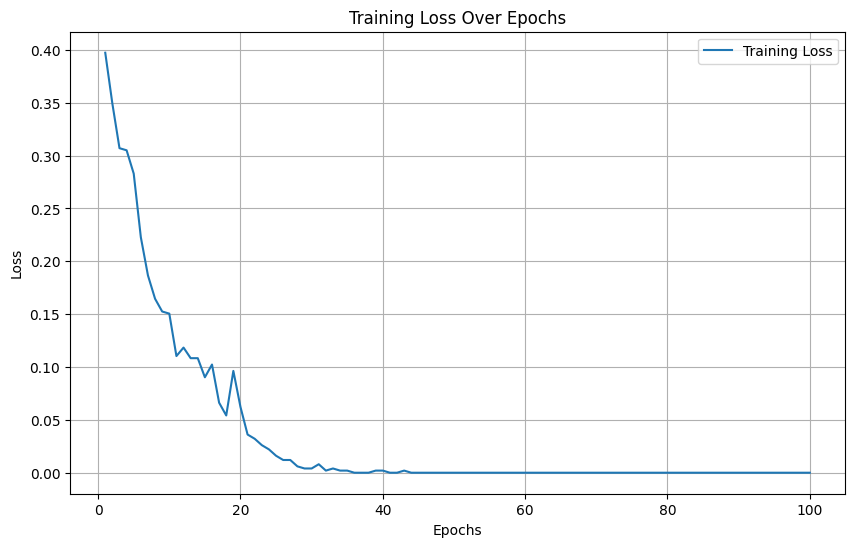

In [97]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# print(df_resampled_train.value_counts())
print(label_resampled_train.value_counts())

Labels
 1        997
-1        996
Name: count, dtype: int64


In [99]:
label_resampled_train.iloc[0,0]

1

In [100]:
def calculate_mcc(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == -1) & (y_pred == -1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))

    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / (denominator + np.finfo(float).eps)

In [135]:
def evaluate_model(nn, X_val, y_val):
    predictions = []

    for i in range(len(X_val)):
        inputs = X_val.iloc[i].values  # Convert DataFrame row to NumPy array
        output = nn.query(inputs)
        predicted_label = 1 if output[0] >= 0.8 else -1
        predictions.append(predicted_label)

    predictions = np.array(predictions)
    print(pd.DataFrame(predictions).value_counts())

    if isinstance(y_val, (pd.DataFrame, pd.Series)):
        y_val = y_val.values.flatten()
    mcc_score = calculate_mcc(y_val, predictions)
    return mcc_score, predictions

# # Calculate MCC for the validation set
# mcc_validation, val_predictions = evaluate_model(nn, df_resampled_val, label_resampled_val)
# print(f"MCC on Validation Set: {mcc_validation}")

 1    436
-1    419
Name: count, dtype: int64
MCC on Validation Set: 0.9791648613863829
(855,)
(855,)


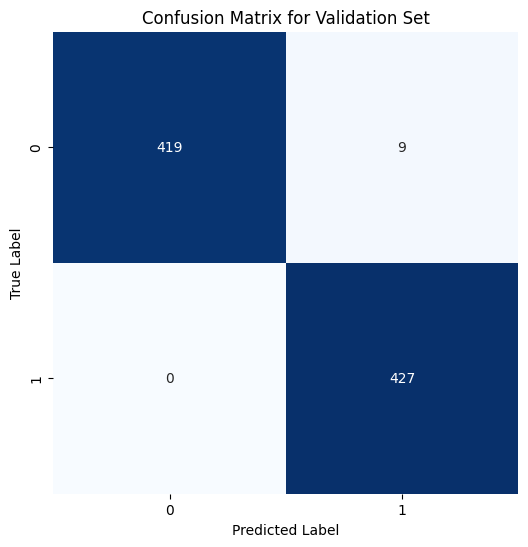

In [139]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Calculate predictions using the evaluate_model function
mcc_validation, val_predictions = evaluate_model(nn, df_resampled_val, label_resampled_val)
print(f"MCC on Validation Set: {mcc_validation}")

print(label_resampled_val.shape)
print(val_predictions.shape)

# Convert actual target values to the appropriate format
if isinstance(label_resampled_val, (pd.DataFrame, pd.Series)):
    label_resampled_val = label_resampled_val.values.flatten()

# Create the confusion matrix
cm = confusion_matrix(label_resampled_val, val_predictions)

# Plot the confusion matrix
plot_confusion_matrix(cm, 'Confusion Matrix for Validation Set')


In [102]:
df_resampled_val.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
1576,1.804878,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.195122,0.0,...,0.00000,0.000000,4.000000,0.00000,0.0,0.0,3.000000,1.000000,0.00000,0.0
324,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,...,0.00000,0.000000,0.000000,0.00000,0.0,0.0,1.000000,1.000000,1.00000,0.0
2123,0.897279,0.0,0.102721,0.0,0.102721,0.0,0.102721,0.0,0.897279,0.0,...,0.00000,0.102721,2.794559,0.00000,0.0,0.0,1.897279,0.000000,0.00000,0.0
2514,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,...,0.48643,0.486430,1.540711,0.51357,0.0,0.0,0.486430,4.972859,0.48643,0.0
2175,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.000000,0.0,...,0.00000,1.000000,3.588774,0.00000,0.0,0.0,2.588774,2.000000,0.00000,0.0


In [103]:
test_aa_frequencies = calculate_amino_acid_frequencies(test_data['Sequence'])
test_freq_array = np.array(test_aa_frequencies)

In [104]:
test_freq_array

array([[4., 0., 1., ..., 0., 1., 0.],
       [4., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 1., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 1., 0.],
       [4., 0., 1., ..., 0., 0., 0.]])

In [105]:
test_vectorized_df = pd.DataFrame(test_freq_array)
test_vectorized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,4.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0
1,4.0,0.0,0.0,4.0,3.0,1.0,3.0,0.0,1.0,0.0,...,2.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,...,1.0,1.0,4.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,...,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
def predict_model(nn, X_test):
    predictions = []

    for i in range(len(X_test)):
        inputs = X_test.iloc[i].values  # Convert DataFrame row to NumPy array
        output = nn.query(inputs)
        predicted_label = 1 if output[0] >= 0.9 else -1
        predictions.append(predicted_label)

    predictions = np.array(predictions)
    return predictions

# Calculate MCC for the validation set
predictions = predict_model(nn, test_vectorized_df)
print(type(predictions))

<class 'numpy.ndarray'>


In [119]:
np.savetxt('format_16_0.08_0.9.dat', predictions, fmt='%d')
# predictions_df = pd.DataFrame(predictions)
# predictions_df.to_csv('format_16_0.08_0.9.csv', index=False)

In [127]:
# def plotCf(a,b,t):
#     cf =confusion_matrix(a,b)
#     plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
#     plt.colorbar()
#     plt.title(t)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     tick_marks = np.arange(len(set(a))) # length of classes
#     class_labels = ['0','1']
#     plt.xticks(tick_marks,class_labels)
#     plt.yticks(tick_marks,class_labels)
#     thresh = cf.max() / 2.
#     for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
#         plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
#     plt.show()